# モンテカルロ積分

$\int f(x) dx = (b-a)E[f(x)]$
として、積分を一様分布の期待値ととらえる。

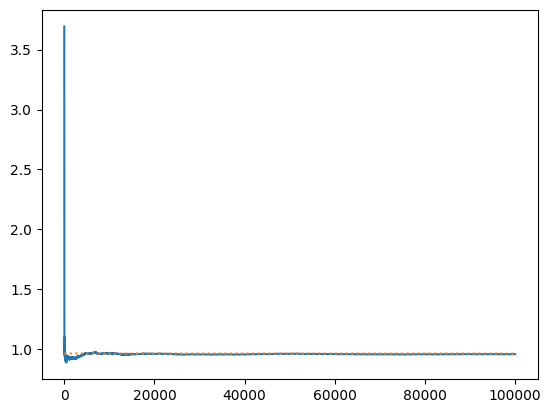

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# f(x) = (cos(50x) + sin(20x))^2のとき
def f(x):
    return (np.cos(50*x) + np.sin(20*x))**2

Integrate = []
mean = 0
for _ in range(10**5):
    u = np.random.uniform()
    mean = (mean*len(Integrate) + f(u))/(len(Integrate) + 1) # 毎回 平均を計算するより、逐次的に計算した方が早い。
    Integrate.append(mean)

plt.figure()
plt.plot(range(10**5), Integrate)
plt.plot(range(10**5),[0.96520]*10**5, linestyle = "dotted")
plt.show()

    


# 周辺確率密度関数

次は、先ほどとは違い真値が計算できないものに対して実施する。

長さNの観測$x_1, x_2, \cdots, x_N | \theta$は独立でコーシー分布$C(\theta, 1)$に従い、Θには、C(0,1)の事前分布を仮定する。
このとき、尤度と周辺確率密度関数は、それぞれ

$$
p(x^N|\theta) = \Pi\frac{1}{\pi (1 + (x_n - \theta)^2)}, p(\theta) = \frac{1}{\pi(1+\theta)^2}
$$
である。したがって、周辺確率密度関数は、
$$
p(x^N) = \int_{-\infty}^{\infty} p(x^N|\theta)p(\theta) d\theta =  \int_{-\infty}^{\infty} p(x^N|\theta)p(\theta) d\theta = \int_{-\infty}^{\infty} \Pi\frac{1}{\pi (1 + (x_n - \theta)^2)}\frac{1}{\pi(1+\theta)^2}
$$

$p(\theta) = \frac{1}{\pi(1+\theta)^2}, f(\theta) = \Pi\frac{1}{\pi (1 + (x_n - \theta)^2)}$
として、$I = \int p(\theta)f(\theta) d\theta$ として計算できる。

つまり、$\theta_1, \theta_2, \cdots, \theta_M$をC(0,1)から、生成し、
$$
\frac{1}{M}\sum_m \Pi_n \frac{1}{\pi (1 + (x_n - \theta_m)^2)}
$$
を計算すればよい。


In [8]:
from scipy.stats import cauchy
N = 10 # 観測データの数
M = 10**6 # 積分で使うデータのサンプル数
theta_ = np.random.standard_cauchy() # 事前分布からサンプル
X = cauchy.rvs(loc=theta_, scale=1, size=N)
theta = np.random.standard_cauchy(size=M)

I = []
mean = 0
i=0
while(len(I) < M):
    _theta = theta[i]
    product = 1
    for x in X:
        product *= 1/(np.pi* ( 1+(x - _theta)**2))
    mean = (mean*len(I) + product)/(len(X) +1)
    I.append(mean)
    i+=1

plt.figure()
plt.plot(range(len(I)), I)
plt.show()
print(X)

/tmp/ipykernel_1195342/1810451577.py:16: RuntimeWarning: overflow encountered in scalar multiply
  mean = (mean*len(I) + product)/(len(X) +1)


KeyboardInterrupt: 